# Menon Labs: Spotify Initial Data Analysis - SVM Model Training

### **Collaborators** 
- Ashna Sood 
- Shubhum Agrawal
- Shania Sinha
- Sergio Vazquez
- Rohil Khatkhate
- Kerrn Reehal

In [1]:
# import statements
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import pickle

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.metrics import make_scorer, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [2]:
# read in labeled songs CSV file
labeled_songs = pd.read_csv('final_labels.csv', index_col='id')
labeled_songs

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,cluster,emotion
id,,,,,,,,,,,,,
35mvY5S1H3J2QZyna3TFe0,positions,['Ariana Grande'],0.468000,0.737,0.802,0.000000,0.0931,0.0878,0.682,-4.771,144.015,0,Energetic
6Hj9jySrnFppAI0sEMCZpJ,Robbery,['Juice WRLD'],0.328000,0.685,0.692,0.000000,0.1530,0.0457,0.578,-5.122,159.966,0,Energetic
2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,['Travis Scott'],0.005130,0.834,0.730,0.000000,0.1240,0.2220,0.446,-3.714,155.008,0,Energetic
27X3qzgB0Show6qfw5wNOK,Esquema Preferido,"['DJ Ivis', 'Tarcísio do Acordeon']",0.256000,0.669,0.812,0.000000,0.0773,0.1100,0.917,-4.597,159.934,0,Energetic
2Y0wPrPQBrGhoLn14xRYCG,Come & Go (with Marshmello),"['Juice WRLD', 'Marshmello']",0.017200,0.625,0.814,0.000000,0.1580,0.0657,0.535,-5.181,144.991,0,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4qZq5qn0CSA6YF96OM5XVZ,Manifest- Manifest (2004),['Abuse'],0.000001,0.141,0.931,0.224000,0.3120,0.2010,0.613,-7.091,212.980,29,Powerful
6T0aBJyFi7U3zHuaYSMWIP,Bach Jao Mundeyo,['Sardool Sikander'],0.533000,0.658,0.852,0.000002,0.0582,0.3560,0.801,-7.159,183.985,29,Powerful
2n8nDfBot4MddUcUKoAqGz,Horseface,['Yea(H)'],0.004480,0.306,0.982,0.243000,0.1800,0.0416,0.558,-5.640,188.499,29,Powerful


In [3]:
# define X and y
X = labeled_songs[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                            'speechiness', 'valence', 'loudness', 'tempo']]
y = labeled_songs.iloc[:, -1:]

In [4]:
# split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# multi-class classification -- One vs One implementation
# using optimal kernal - Linear and optimal C value - 100, train the SVM model 
svm_model = make_pipeline(StandardScaler(), SVC(C=100, kernel="linear", decision_function_shape="ovo"))
svm_model.fit(X_train, y_train)
print("Done")

Done


In [10]:
# calculate the training accuracy
svm_train_acc = svm_model.score(X_train, y_train)
print("Training Set accuracy", svm_train_acc)

# make predictions and calculate the testing accuracy
svm_pred = svm_model.predict(X_test)
svm_true = y_test
svm_test_acc = accuracy_score(svm_true, svm_pred)
print("Test Set accuracy", svm_test_acc)

Training Set accuracy 0.7553722413131209
Test Set accuracy 0.7562421972534332


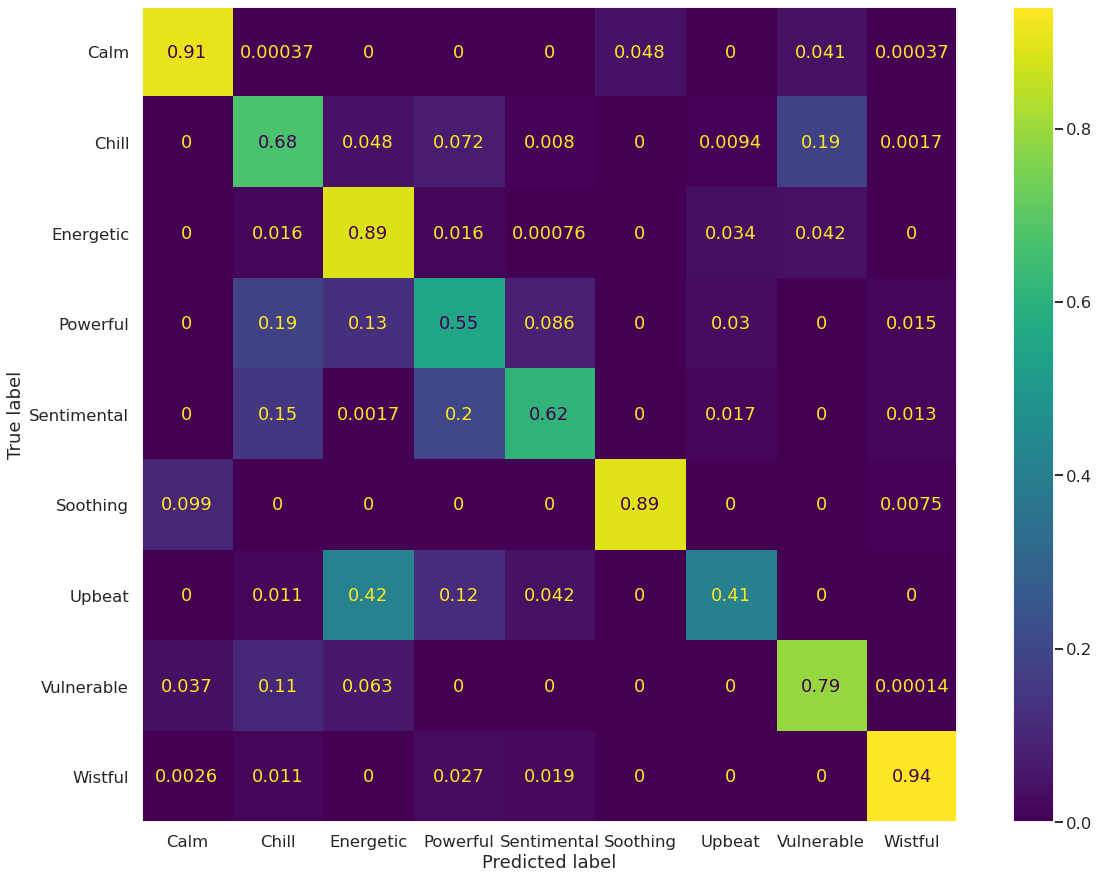

In [11]:
# caclulate confusion matrix to visualize TP, FP, TN, FN rates 
fig, ax = plt.subplots(figsize=(20, 15))
plot_confusion_matrix(svm_model,X_test,y_test,normalize='true', ax=ax)
plt.grid(False)

In [12]:
# save X_test predicted emotion labels and compare with actual label
results = pd.DataFrame(svm_true)
results["Predicted"] = svm_pred
results.columns = ["Actual", "Predicted"]
results

,Actual,Predicted
id,,
4Mh1wt97o74zyAavj0uMu4,Chill,Vulnerable
3I1vEQhGwRK7URrTq4BqNl,Powerful,Chill
0lsDJ0EkccufmSM43P28TQ,Energetic,Energetic
6tfBZQxuW5jSzlYEIxE54p,Sentimental,Powerful
1uImgVKNiAzhPBZYh0yHze,Vulnerable,Vulnerable
...,...,...
66Jg7mhpYOI31PnyEmHL9f,Sentimental,Sentimental
5JLlj9lZHPTeNApZTiXvBt,Energetic,Energetic
3melpbacqZg56F5VfqWd7O,Energetic,Chill


In [13]:
# incorrectly identified songs 
incorrect_results = results.loc[results["Actual"] != results["Predicted"]]   
incorrect_results

,Actual,Predicted
id,,
4Mh1wt97o74zyAavj0uMu4,Chill,Vulnerable
3I1vEQhGwRK7URrTq4BqNl,Powerful,Chill
6tfBZQxuW5jSzlYEIxE54p,Sentimental,Powerful
40m00PHKCDfc73TQboFWFP,Vulnerable,Chill
6MiUU7uPIjcFGGKnCstmaQ,Vulnerable,Chill
...,...,...
0lrwDj4eSceHCAmz0tQVRN,Energetic,Upbeat
1rRcFwE1ydO2Y5jSmk1UIs,Upbeat,Energetic
57LqqlBkpcEc6axCbSX6wP,Powerful,Upbeat


In [16]:
# audio features for the incorrectly identified songs
incorrect_vals = pd.merge(labeled_songs, incorrect_results, on='id', how='left')
incorrect_vals.dropna(inplace=True)
incorrect_vals

,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,loudness,tempo,cluster,emotion,Actual,Predicted
id,,,,,,,,,,,,,,,
2ZdCrBA52bb4pIG3tOOZiQ,Dark Queen,['Lil Uzi Vert'],0.222000,0.747,0.606,0.000000,0.2810,0.1720,0.200,-5.286,155.055,0,Energetic,Energetic,Upbeat
5Zlo5ZYjrr6DwQw1kBi5bA,moonchild,['RM'],0.025400,0.504,0.869,0.000000,0.0659,0.2130,0.190,-5.576,157.992,0,Energetic,Energetic,Upbeat
2uJcLlydqLdGiiABFa4KfN,Mr Red White and Blue,['Coffey Anderson'],0.140000,0.501,0.743,0.000007,0.2510,0.0370,0.325,-5.789,156.036,0,Energetic,Energetic,Upbeat
2OXidlnDThZR3zf36k6DVL,Just A Kiss,['Lady A'],0.446000,0.593,0.639,0.000000,0.0998,0.0307,0.332,-5.826,142.881,0,Energetic,Energetic,Upbeat
26waqvvTo7eyRIApBjY5jM,Lo Intenté Todo,"['Reik', 'Jessie Reyez']",0.610000,0.388,0.425,0.000000,0.1040,0.0328,0.184,-4.506,146.939,0,Energetic,Energetic,Upbeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5PD4ArCJF1RgR5UhVeLQBh,Snapbackboi,"['Nonsense Stinks', 'Daugse']",0.000116,0.457,0.589,0.159000,0.3450,0.4860,0.440,-11.308,194.001,29,Powerful,Powerful,Sentimental
11OlmeyUCHPdzXjpjZyQGB,Stop and Stare,['Stereo Avenue'],0.168000,0.331,0.497,0.000001,0.0904,0.0319,0.247,-8.236,184.804,29,Powerful,Powerful,Sentimental
4QL6CCotH7yLuCw7tAqBxq,The Winter Ends - Demo January 2013,['Joy/Disaster'],0.002840,0.338,0.700,0.041400,0.1260,0.0484,0.175,-8.376,199.660,29,Powerful,Powerful,Sentimental


In [35]:
# calculate F1 Score as a further metric to evaluate model performance
from sklearn.metrics import f1_score
f1_score(svm_true, svm_pred, average='weighted')

0.7503032194834779

Ultimately, the SVM model performed moderately well as it only achieved a test set accuracy of 75.6%. Ultimately, the SVM model was not used as the final model to predict the emotion label of a song, as the KNN model approach provided a higher accuracy in model prediction.

In [17]:
# save the model
# Save to file in the current working directory
pkl_filename = "final_SVM_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svm_model, file)